In [68]:
import numpy as np
perch_length = np.array(
 [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
 )
perch_weight = np.array(
 [ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
 1000.0, 1000.0]
 )

In [69]:
from sklearn.model_selection import train_test_split
# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [71]:
print()


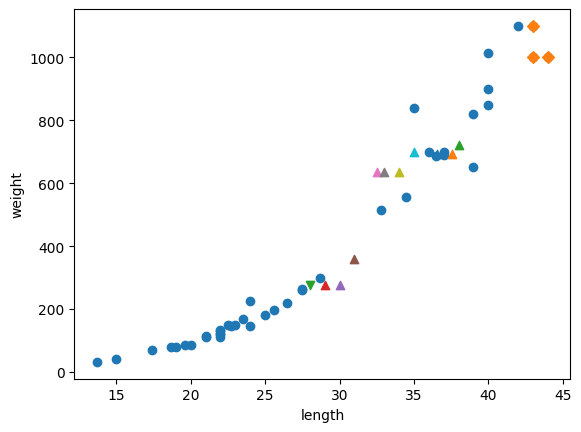

In [72]:
import matplotlib.pyplot as plt
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
input = 28
plt.scatter(28, knr.predict([[28]]), marker='v')
plt.scatter(29, knr.predict([[29]]), marker='^')
plt.scatter(30, knr.predict([[30]]), marker='^')
plt.scatter(31, knr.predict([[31]]), marker='^')
plt.scatter(32.55, knr.predict([[32.55]]), marker='^')
plt.scatter(33, knr.predict([[33]]), marker='^')
plt.scatter(34, knr.predict([[34]]), marker='^')
plt.scatter(35, knr.predict([[35]]), marker='^')
plt.scatter(36.55, knr.predict([[36.55]]), marker='^')
plt.scatter(37.55, knr.predict([[37.55]]), marker='^')
plt.scatter(38, knr.predict([[38]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [73]:
print(np.mean(train_target[indexes]))


1033.3333333333333


In [74]:
print(knr.predict([[100]]))


[1033.33333333]


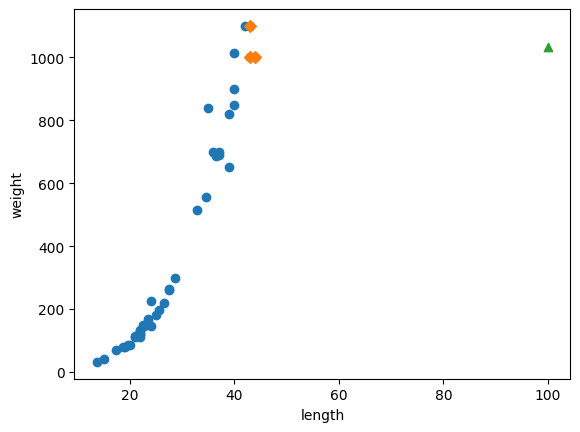

In [75]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



---



In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델을 훈련합니다
lr.fit(train_input, train_target)
# 50cm 농어에 대해 예측합니다
print(lr.predict([[50]]))

[1241.83860323]


In [77]:
print(lr.coef_, lr.intercept_)


[39.01714496] -709.0186449535477


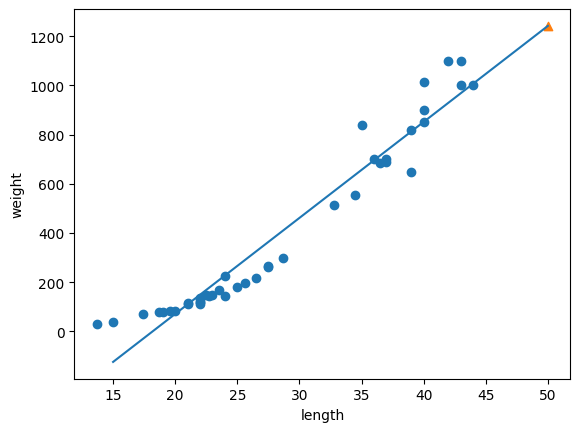

In [78]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [79]:
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [80]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [110]:
print(train_input, test_input)
print(train_poly, train_poly.shape, test_poly,test_poly.shape)


[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]] [[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]

In [105]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
fish_length = 2
print(lr.predict([[fish_length**2, fish_length]]))

[76.99168926]


In [88]:
print(lr.coef_, lr.intercept_)
print(lr.coef_[1])


[  1.01433211 -21.55792498] 116.0502107827827
-21.557924978837352


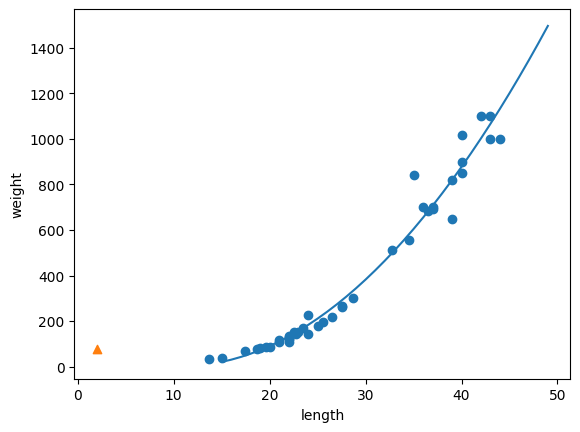

In [106]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
# 50cm 농어 데이터
plt.scatter(fish_length, lr.predict([[fish_length**2, fish_length]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [108]:
print(lr.score(train_poly, train_target)) # 훈련 세트
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
